In [15]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns

In [16]:
data = pd.read_csv("C:\\Users\\Farzana Saif\\Downloads\\salaries.csv")
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


# Analysing the Data

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
yrs.since.phd,397.0,22.314861,12.887003,1.0,12.0,21.0,32.0,56.0
yrs.service,397.0,17.614610,13.006024,0.0,7.0,16.0,27.0,60.0
salary,397.0,113706.458438,30289.038695,57800.0,91000.0,107300.0,134185.0,231545.0


In [18]:
data.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [19]:
data.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [20]:
data.shape

(397, 6)

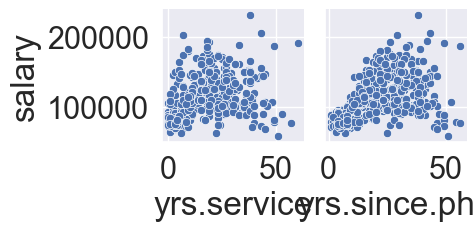

In [21]:
#Plotting Continuous

sns.pairplot( data = data,
             y_vars = ['salary'],
             x_vars= ['yrs.service', 'yrs.since.phd'] )

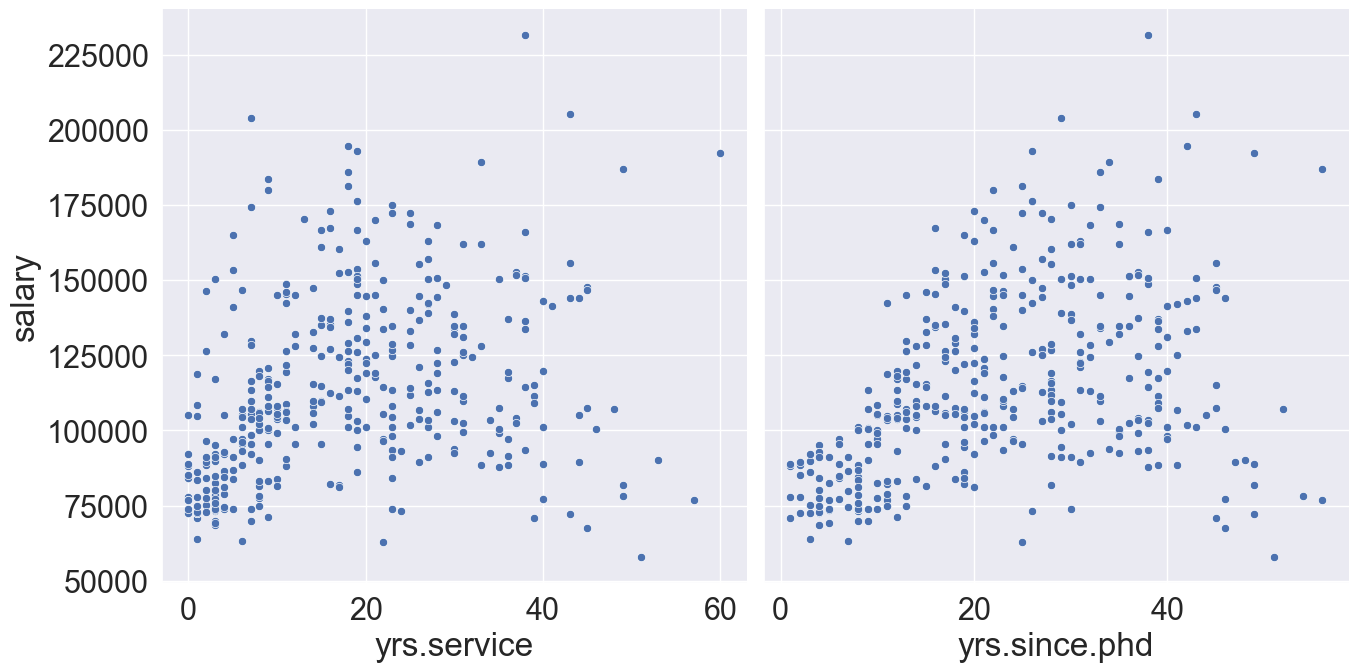

In [22]:
sns.pairplot( data = data,
             y_vars = ['salary'],
             x_vars= ['yrs.service', 'yrs.since.phd'],
              height = 7 )

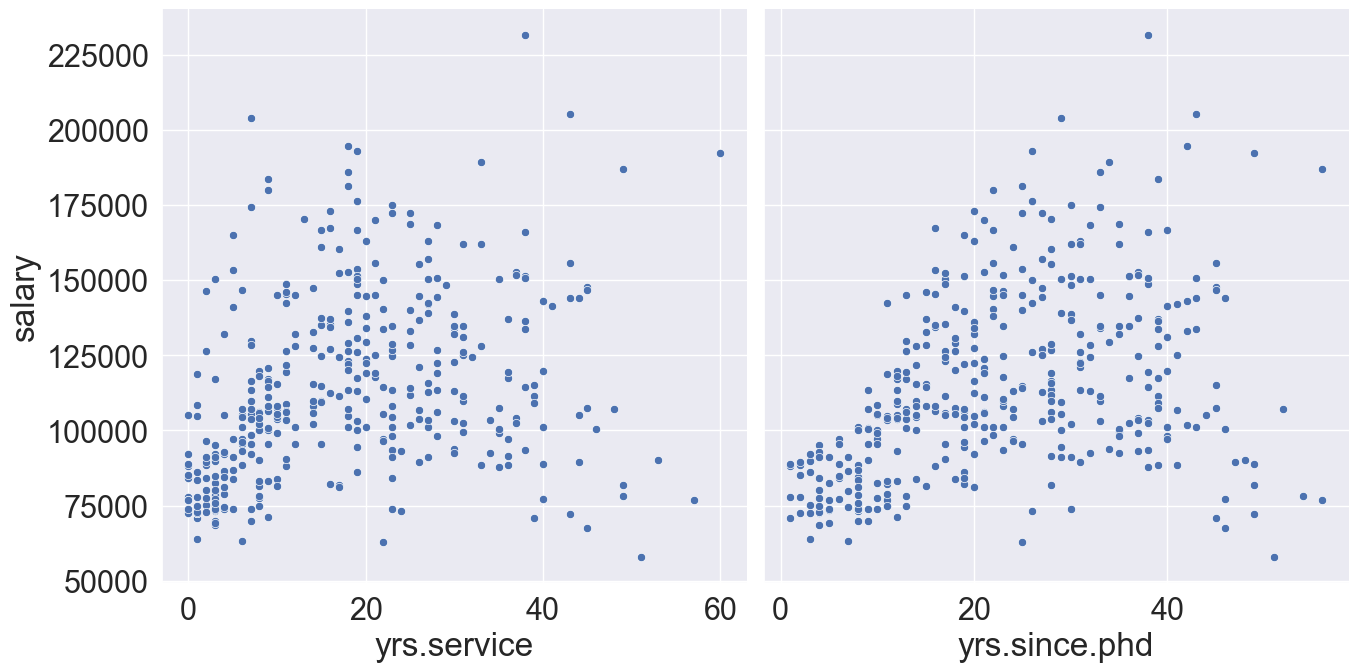

In [23]:
sns. set (font_scale=2)
sns.pairplot( data = data,
             y_vars = ['salary'],
             x_vars= ['yrs.service', 'yrs.since.phd'],
              height = 7 )

<Axes: >

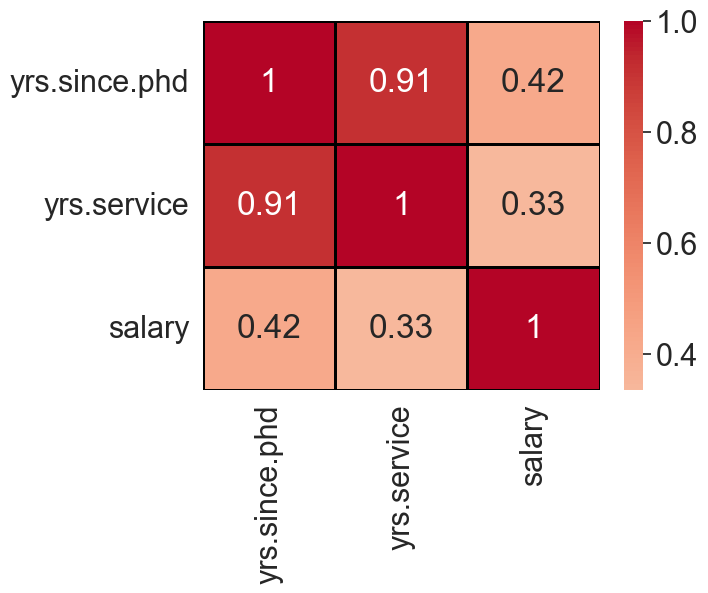

In [24]:
#Correlation Matrix
sns.heatmap(data.select_dtypes(include=['number']).corr(),
            annot=True,
            fmt='.2g',
            center=0,
            cmap='coolwarm',
            linewidths=1,
            linecolor='black')


In [25]:
data['rank'].value_counts()

rank
Prof         266
AsstProf      67
AssocProf     64
Name: count, dtype: int64

In [26]:
data['rank'].value_counts()
data.select_dtypes(include = 'object').value_counts()

rank       discipline  sex   
Prof       B           Male      125
           A           Male      123
AsstProf   B           Male       38
AssocProf  B           Male       32
           A           Male       22
AsstProf   A           Male       18
Prof       B           Female     10
           A           Female      8
AsstProf   A           Female      6
AssocProf  B           Female      6
AsstProf   B           Female      5
AssocProf  A           Female      4
Name: count, dtype: int64

In [27]:
categorical = data.select_dtypes(include = 'object')
categorical

,rank,discipline,sex
0,Prof,B,Male
1,Prof,B,Male
2,AsstProf,B,Male
3,Prof,B,Male
4,Prof,B,Male
...,...,...,...
392,Prof,A,Male
393,Prof,A,Male
394,Prof,A,Male
395,Prof,A,Male


In [28]:
categorical = list(data.select_dtypes(include = 'object'))
for cat in categorical:
    print(data[cat].value_counts())

rank
Prof         266
AsstProf      67
AssocProf     64
Name: count, dtype: int64
discipline
B    216
A    181
Name: count, dtype: int64
sex
Male      358
Female     39
Name: count, dtype: int64


In [29]:
#Transforms object into dummies 
data = pd.get_dummies (data = data, drop_first= True )
data.head(2)

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,139750,False,True,True,True
1,20,16,173200,False,True,True,True


In [30]:
data = pd.get_dummies(data, drop_first=True).astype(int)
data.head(2)

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,139750,0,1,1,1
1,20,16,173200,0,1,1,1


# Multilinear Regression

In [31]:
#isolate X and Y
y = data.salary / 1000
y

0      139.750
1      173.200
2       79.750
3      115.000
4      141.500
        ...   
392    103.106
393    150.564
394    101.738
395     95.329
396     81.035
Name: salary, Length: 397, dtype: float64